In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

import re
import requests
from bs4 import BeautifulSoup as bs

In [235]:
csv = 'movies.csv'
movies = pd.read_csv(csv)
movies.head()

,Title,IMDBRating,IMDBRatingCount,ReleaseDate,RunTime,UserCount,CriticCount,Metascore,Popularity,PopularityTrend,...,Opening,GrossUSA,GrossIntl,Country,PlotKeywords,Awards,Genres,MPAA,ProdCo,Stars
0,It (2017),7.4,286942,8 September 2017,135.0,1328,549,69.0,15,+36,...,123403419.0,327481748,700381748,USA,"['killer clown', 'clown', 'small town', 'ballo...",['5 wins & 38 nominations.'],"['Drama', 'Horror', 'Thriller']",R,"['New Line Cinema', 'RatPac-Dune Entertainment...","['Bill Skarsgård', 'Jaeden Lieberher', 'Finn W..."
1,The Greatest Showman (2017),7.7,138013,20 December 2017,105.0,1160,302,48.0,31,+1,...,8805843.0,174307966,434236813,USA,"['social outcast', 'social prejudice', 'circus...","['Nominated for 1 Oscar.', 'Another 8 wins & 2...","['Biography', 'Drama', 'Musical']",PG,"['Chernin Entertainment', 'TSG Entertainment',...","['Hugh Jackman', 'Michelle Williams', 'Zac Efr..."
2,Thor: Ragnarok (2017),7.9,357134,3 November 2017,130.0,1129,478,74.0,33,-4,...,122744989.0,315058289,853977126,USA,"['marvel comics', 'marvel cinematic universe',...",['5 wins & 36 nominations.'],"['Action', 'Adventure', 'Comedy', 'Fantasy', '...",PG-13,"['Walt Disney Pictures', 'Marvel Studios', 'Sc...","['Chris Hemsworth', 'Tom Hiddleston', 'Cate Bl..."
3,Star Wars: Episode VIII - The Last Jedi (2017),7.3,397407,15 December 2017,152.0,5360,639,85.0,42,+18,...,220009584.0,620181382,1332704286,USA,"['wisecrack humor', 'sabotage', 'betrayal', 'd...","['Nominated for 4 Oscars.', 'Another 16 wins &...","['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",PG-13,"['Walt Disney Pictures', 'Lucasfilm', 'Ram Ber...","['Daisy Ridley', 'John Boyega', 'Mark Hamill']"
4,Disobedience (2017),6.8,5336,27 April 2018,114.0,50,88,74.0,54,+177,...,237393.0,3478877,5290287,UK,"['lesbian relationship', ""spitting in someone'...",['2 nominations.'],"['Drama', 'Romance']",R,"['Braven Films', 'Element Pictures', 'Film 4']","['Rachel Weisz', 'Rachel McAdams', 'Alessandro..."


In [236]:
movies['Genres'] = movies['Genres'].str.strip('[]').str.replace('\'', '')
movies['ProdCo'] = movies['ProdCo'].str.strip('[]').str.replace('\'', '').str.replace('\"', '').str.replace('The', '')
movies['Stars'] = movies['Stars'].str.strip('[]').str.replace('\'', '').str.replace('\"', '')
movies['PlotKeywords'] = movies['PlotKeywords'].str.strip('[]').str.replace('\'', '')
movies['Awards'] = movies['Awards'].str.strip('[]').str.replace('\'', '').str.replace('.', '').str.lower().str.replace('for ', '').str.replace('wins', 'win'). str.replace('nominations', 'nomination')

In [237]:
movies[movies['Title'].duplicated()]

,Title,IMDBRating,IMDBRatingCount,ReleaseDate,RunTime,UserCount,CriticCount,Metascore,Popularity,PopularityTrend,...,Opening,GrossUSA,GrossIntl,Country,PlotKeywords,Awards,Genres,MPAA,ProdCo,Stars
4631,Soldier (1998),6.0,47420,23 October 1998,99.0,378,69,NaN,"3,672",+943,...,6447237.0,14567883,NaN,India,"time bomb, soldier, planet, crash survivor, su...",1 nomination,"Action, Drama, Sci-Fi",R,"Warner Bros., Morgan Creek Entertainment Group...","Kurt Russell, Jason Scott Lee, Jason Isaacs"
5032,Soldier (1998),6.2,2088,12 October 1998,156.0,6,1,NaN,NaN,NaN,...,NaN,NaN,NaN,UK,"traitor, australia, army, vulture, murder",5 win,"Action, Drama, Musical, Mystery, Romance, Thri...",NaN,NaN,"Rakhee Gulzar, Bobby Deol, Preity Zinta"
5033,Soldier (1998),6.2,2088,12 October 1998,156.0,6,1,NaN,NaN,NaN,...,NaN,NaN,NaN,India,"traitor, australia, army, vulture, murder",5 win,"Action, Drama, Musical, Mystery, Romance, Thri...",NaN,NaN,"Rakhee Gulzar, Bobby Deol, Preity Zinta"
6449,The Warrior (2001),6.8,2275,15 July 2005,NaN,43,32,65.0,NaN,NaN,...,14130.0,48160,NaN,South Korea,"warrior, amulet, thief, village, sword","nominated 1 bafta film award, another 8 win & ...","Adventure, Drama",R,"FilmFour, Senator Film Produktion, British Scr...","Irrfan Khan, Puru Chibber, Aino Annuddin"
6566,The Warrior (2001),7.2,10318,7 September 2001 (South,158.0,97,38,NaN,NaN,NaN,...,NaN,NaN,NaN,UK,"battle, china, princess, desert, korea",2 win & 2 nomination,"Action, Drama, History, War",R,"Beijing Film Studio, CJ Entertainment, China Film","Woo-sung Jung, Sung-Ki Ahn, Jin-mo Ju"
6567,The Warrior (2001),7.2,10318,7 September 2001 (South,158.0,97,38,NaN,NaN,NaN,...,NaN,NaN,NaN,South Korea,"battle, china, princess, desert, korea",2 win & 2 nomination,"Action, Drama, History, War",R,"Beijing Film Studio, CJ Entertainment, China Film","Woo-sung Jung, Sung-Ki Ahn, Jin-mo Ju"
8179,Chaos (2005),6.5,47355,15 December 2005 (United Arab,106.0,103,49,NaN,"4,544",-345,...,NaN,NaN,7000000,USA,"chaos theory, power outage, investigation, exp...",NaN,"Action, Crime, Drama, Thriller",R,"Mobius International, Chaotic Productions, Cha...","Jason Statham, Ryan Phillippe, Wesley Snipes"
8298,Chaos (2005),3.2,1865,10 August 2005,74.0,64,26,1.0,NaN,NaN,...,NaN,NaN,NaN,Canada,"anal rape, breast removal, sexual violence, se...",NaN,"Horror, Thriller",NOT RATED,NaN,"Kevin Gage, Sage Stallone, Kelly K.C. Quann"
8299,Chaos (2005),3.2,1865,10 August 2005,74.0,64,26,1.0,NaN,NaN,...,NaN,NaN,NaN,USA,"anal rape, breast removal, sexual violence, se...",NaN,"Horror, Thriller",NOT RATED,NaN,"Kevin Gage, Sage Stallone, Kelly K.C. Quann"
12820,Eden (2014),4.7,2417,18 September 2015,90.0,13,8,NaN,NaN,NaN,...,NaN,NaN,1100000,France,"island, soccer team, plane crash, stranded, fl...",NaN,"Drama, Thriller",R,"Gobsmack, H&H Creative Ventures, Ombra Films","James Remar, Diego Boneta, Rob Mayes"


In [238]:
movies.drop([1318, 5032, 6566, 8298, 12855], inplace=True)

In [239]:
def clean_date(rows):
    i = rows['ReleaseDate']
    if pd.isna(i):
        return None
    elif '(' in i:
        return i.replace(i[i.rfind('('):], '').strip()
    else: return i

movies['ReleaseDate'] = movies.apply(clean_date, axis=1)
movies['ReleaseDate'] = pd.to_datetime(movies['ReleaseDate'], infer_datetime_format=True)

In [240]:
movies['UserCount'] = movies['UserCount'].str.extract('(\d+)').astype(float)
movies['CriticCount'] = movies['CriticCount'].str.extract('(\d+)').astype(float)
movies['Popularity'] = movies['Popularity'].str.replace(',', '').astype(float)
movies['PopularityTrend'] = movies['PopularityTrend'].str.replace(',', '').astype(float)

In [241]:
exchange = {'AED': 3.673226,'ARS': 27.19379, 'AUD': 1.352518, 'BRL': 3.876623, 'CAD': 1.317735,
            'CHF': 1.004057, 'CLP': 649.9436, 'CNY': 6.69011, 'CZK': 22.24431, 'DEM': 0.5981,
            'DKK': 6.366525, 'EUR': 0.858433, 'FRF': 0.858433, 'GBP': 0.758702, 'HKD': 7.848498,
            'HUF': 277.8622, 'IEP': 1.48384, 'ILS': 3.644134, 'ITL': 1656.86, 'INR': 68.5068,
            'ISK': 107.4348, 'JPY': 112.4974, 'KRW': 1127.11, 'KWD': 0.302817, 'MXN': 18.93298,
            'NOK': 8.136765, 'NZD': 1.481336, 'PEN': 3.276077, 'PHP': 53.52889, 'PKR': 121.6936,
            'PLN': 3.706481, 'RON': 4.01131, 'RUR': 62.27931, 'SAR': 3.750484, 'SEK': 8.902313,
            'SGD': 1.365964, 'THB': 33.30876, 'TWD': 30.60353, 'UAH': 26.23139, 'USD': 1.0,
            'XDR': 0.713272, 'ZAR': 13.30807, 'FIM': 0.19675, 'BEF': 0.028999, 'ESP': 0.007031,
            'TRL': 2.0765E-7, 'BND': 0.7398, 'NLG': 0.5283, 'DOP': 0.020178, 'JMD': 0.007663,
            'NPR': 0.0091, 'ATS': 0.8501, 'VND': 0.4349E-4}

In [242]:
movies['BudgetCurr'] = movies['Budget'].str.extract('(\D+)').replace('€', 'EUR').replace('£', 'GBP')[0].str.strip()
movies['Budget'] = movies['Budget'].str.extract('(\d+)').astype(float)

In [243]:
def adj_budget(rows):
    i = rows['Budget']
    j = rows['BudgetCurr']
    if pd.isna(i):
        return None
    if pd.isna(j):
        return i
    else: return i / exchange[j]

movies['Budget'] = movies.apply(adj_budget, axis=1)

In [244]:
movies['GrossUSA'] = movies['GrossUSA'].astype(float)

In [245]:
movies['GrossIntlCurr'] = movies['GrossIntl'].str.extract('(\D+)').replace('€', 'EUR').replace('£', 'GBP')[0].str.strip()
movies['GrossIntl'] = movies['GrossIntl'].str.extract('(\d+)').astype(float)

In [246]:
def adj_grossintl(rows):
    i = rows['GrossIntl']
    j = rows['GrossIntlCurr']
    if pd.isna(i):
        return None
    if pd.isna(j):
        return i
    else: return i / exchange[j]

movies['GrossIntl'] = movies.apply(adj_grossintl, axis=1)

In [247]:
movies.drop('BudgetCurr', axis=1, inplace=True)
movies.drop('GrossIntlCurr', axis=1, inplace=True)

In [248]:
def get_noms(rows):
    i = rows['Awards']
    if pd.isna(i):
        return None
    i = i.split()
    noms = 0
    try:
        i.index('nominated')
        noms += int(i[i.index('nominated') + 1])
    except ValueError:
        noms += 0
    try:
        i.index('nomination')
        noms += int(i[i.index('nomination') - 1])
    except ValueError:
        noms += 0
    return noms

def get_wins(rows):
    i = rows['Awards']
    if pd.isna(i):
        return None
    i = i.split()
    wins = 0
    try:
        i.index('won')
        wins += int(i[i.index('won') + 1])
    except ValueError:
        wins += 0
    try:
        i.index('win')
        wins += int(i[i.index('win') - 1])
    except ValueError:
        wins += 0
    return wins

In [249]:
movies['Noms'] = movies.apply(get_noms, axis=1)
movies['Wins'] = movies.apply(get_wins, axis=1)
movies['Awards'] = movies['Noms'] + movies['Wins']

In [250]:
genres = movies['Genres'].str.split(',').apply(pd.Series).stack().str.strip().reset_index()
idmb = movies['IMDBRating'].reset_index()
genres_eda = pd.merge(idmb, genres, left_on='index', right_on='level_0')
genres_eda.drop('level_0', axis=1, inplace=True)
genres_eda.drop('level_1', axis=1, inplace=True)
genres_eda.rename(columns={'index': 'ID', 0: 'Genres'}, inplace=True)

In [251]:
genres_eda.groupby('Genres')['IMDBRating'].size()

Genres
Action       2852
Adult           3
Adventure    1594
Animation     499
Biography     654
Comedy       4992
Crime        2437
Drama        8325
Family       1022
Fantasy      1265
History       440
Horror       1817
Music         396
Musical       314
Mystery      1336
Romance      3426
Sci-Fi       1223
Sport         368
Thriller     4068
War           451
Western       167
Name: IMDBRating, dtype: int64

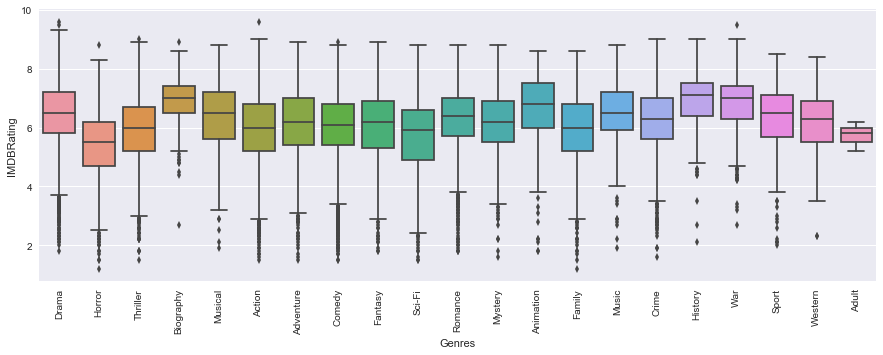

In [252]:
fig, ax = plt.subplots(figsize=(15, 5))
p = sns.boxplot(x='Genres', y='IMDBRating', data=genres_eda);
plt.xticks(rotation=90);

In [253]:
movies['MPAA'] = movies['MPAA'].str.replace('UNRATED', 'NOT RATED')

In [254]:
movies.loc[movies['MPAA'].isin(['AO', 'M', 'TV-Y7', 'TV-Y', 'X', 'TV-G']), ['MPAA']] = 'OTHER'

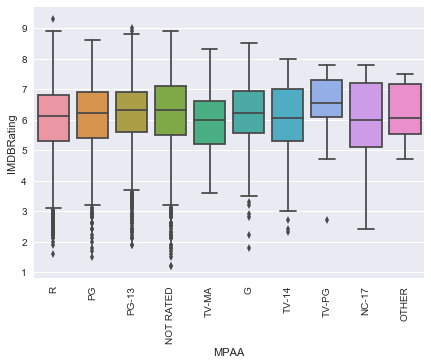

In [255]:
fig, ax = plt.subplots(figsize=(7, 5))
p = sns.boxplot(x='MPAA', y='IMDBRating', data=movies);
plt.xticks(rotation=90);

In [309]:
prodco = movies['ProdCo'].str.split(',').apply(pd.Series).stack().str.strip().reset_index()
prodco.drop(list(prodco[prodco[0] == ''].index), inplace=True)
prodco_eda = pd.merge(idmb, prodco, left_on='index', right_on='level_0')
prodco_eda.drop('level_0', axis=1, inplace=True)
prodco_eda.drop('level_1', axis=1, inplace=True)
prodco_count = prodco_eda[0].value_counts().reset_index()
prodco_other = prodco_count[prodco_count[0] < 10]['index']
prodco.loc[prodco[0].isin(prodco_other), 0] = 'Other'

In [317]:
prodco_transf = prodco.groupby('level_0')[0].apply(lambda i: ', '.join(i)).reset_index().set_index('level_0')
movies = movies.join(prodco_transf)
movies['ProdCo'] = movies[0]
movies.drop(0, axis=1, inplace=True)

In [327]:
movies.to_csv('movies_clean.csv', index=False)